# Project 3

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Question 1.1

In [99]:
N = 8000
mean = np.array([3, -1])
std = np.array([2,0.8])
alpha = np.array([0.25,0.75])
X = np.array([])
for i in range(N):
    if(np.random.randint(1,5) == 1):
        X = np.append(X,np.random.normal(mean[0], std[0]))
    else:
        X = np.append(X,np.random.normal(mean[1], std[1]))
X

array([ 2.65599408, -1.00579035,  0.16866491, ...,  5.61384944,
       -0.60286526, -1.31504525])

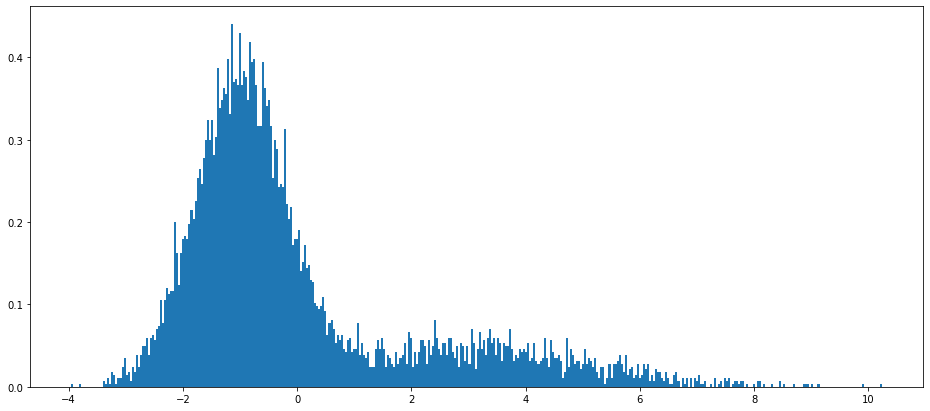

In [100]:
plt.figure(figsize=(16,7))
plt.hist(X, bins=400, density=1)

plt.show()

## Question 1.2

<font size = 5>$ f(x)=\frac{1}{\sqrt{2\pi}\sigma} exp (-\frac{(x-\mu)^2}{2\sigma^2})$ </font>

In [101]:
def guassian(x, mean, cov):
    return np.exp(-0.5* np.dot(x-mean,x-mean)/cov)/(np.sqrt(2*np.pi*cov))

<font size = 5> E-step </font>

<font size = 5>$p(l|\pmb{x}_i,\Theta^g)= \frac{\alpha^g_l p_l(\pmb{x}_i|\Theta_l^g)}{\sum_\limits{j=1}^M{\alpha^g_j p_j(\pmb{x}_i|\Theta_j^g)}} $ </font>

In [102]:
def pro_l_given_i(i,l):
    sum = 0
    j = 0
    for j in range(M):
        sum += alpha[j]*guassian(X[i],mean[j],cov[j])
    return alpha[l]*guassian(X[i],mean[l],cov[l])/sum

<font size = 5> M-step </font>

<font size = 5>$\alpha^{new}_l=\frac{1}{N} \sum_\limits{i=1}^N p(l|\pmb{x}_i,\Theta^g)$</font>

In [103]:
def update_alpha():
    alpha_new = np.array([])
    l = 0
    for l in range(M):
        sum_1 = 0
        i = 0
        for i in range(N):
            sum_1 += pro[i][l]
        
        alpha_new = np.append(alpha_new,sum_1 / N)
    return alpha_new

<font size = 5>$\pmb{\mu}_l^{new}= \frac{\sum_\limits{i=1}^N\pmb{x}_ip(l|\pmb{x}_i,\Theta^g)}{\sum_\limits{i=1}^Np(l|\pmb{x}_i,\Theta^g)} $ </font>

In [104]:
def update_mu():
    mu_new = np.array([])
    l = 0
    for l in range(M):
        sum1 = 0
        i = 0
        for i in range(N):
            sum1 += pro[i][l]
        sum2 = 0
        i = 0
        for i in range(N):
            sum2 += X[i] * pro[i][l]
        mu_new = np.append(mu_new,sum2/sum1)
        
    return mu_new

<font size = 5>$\Sigma_l^{new}=\frac{\sum_\limits{i=1}^Np(l|\pmb{x}_i,\Theta^g)(\pmb{x}_i-\pmb{\mu}_l^{new})(\pmb{x}_i-\pmb{\mu}_l^{new})^T}{\sum_\limits{i=1}^Np(l|\pmb{x}_i,\Theta^g)}$</font>

In [105]:
def update_var(mean_n):
    var_new = np.array([])
    l = 0
    for l in range(M):
        sum3 = 0
        i = 0
        for i in range(N):
            sum3 += pro[i][l]
        sum4 = 0
        i = 0
        for i in range(N):
            sum4 += pro[i][l] * np.dot(X[i]-mean_n[l],X[i]-mean_n[l])
        var_new  = np.append(var_new,sum4/sum3)
    return var_new


<font size = 5> start iteration </font>

In [106]:
# set an initial value
alpha = np.array([0.5,0.5])
mean = np.array([2,1])
cov = np.array([5,3])
M = 2
times = 41
likelyhood = np.array([])
# use a table to optimize
pro = np.zeros((N,M))

print("-------------------------------------")
print("true parameters:")
print("alpha:    ",[0.25,0.75])
print("mean:     ",[3,-1])
print("variance: ",[4,0.64])
print("-------------------------------------")
print("-------------------------------------")
print("initial value:")
print("alpha:    ",[0.5,0.5])
print("mean:     ",[2,1])
print("variance: ",[5,3])
print("-------------------------------------")
for it in range(times):
    
    for i in range(N):
        for l in range(M):
            pro[i][l] = pro_l_given_i(i,l)
    
    # compute the loglikelyhood
    llh = 0
    for i in range(N):
        pi = 0
        for l in range(M):
            pi += alpha[l] * pro[i][l]
        llh += np.log(pi)
    likelyhood = np.append(likelyhood,llh)
    # update
    alpha = np.array(update_alpha())
    mean = np.array(update_mu())
    cov = np.array(update_var(mean))
    if(it%8 == 0):
        print("-------------------------------------")
        print("Iteration:",it)
        print("alpha:    ",alpha)
        print("mean:     ",mean)
        print("variance: ",cov)
        print("-------------------------------------")


-------------------------------------
true parameters:
alpha:     [0.25, 0.75]
mean:      [3, -1]
variance:  [4, 0.64]
-------------------------------------
-------------------------------------
initial value:
alpha:     [0.5, 0.5]
mean:      [2, 1]
variance:  [5, 3]
-------------------------------------
-------------------------------------
Iteration: 0
alpha:     [0.44522853 0.55477147]
mean:      [ 0.55427729 -0.44087542]
variance:  [6.67983054 2.4155024 ]
-------------------------------------
-------------------------------------
Iteration: 8
alpha:     [0.29171451 0.70828549]
mean:      [ 2.50677224 -1.02934043]
variance:  [5.38122154 0.57233104]
-------------------------------------
-------------------------------------
Iteration: 16
alpha:     [0.26462657 0.73537343]
mean:      [ 2.83344762 -1.01664072]
variance:  [4.64246867 0.60596765]
-------------------------------------
-------------------------------------
Iteration: 24
alpha:     [0.25500028 0.74499972]
mean:      [ 2.958

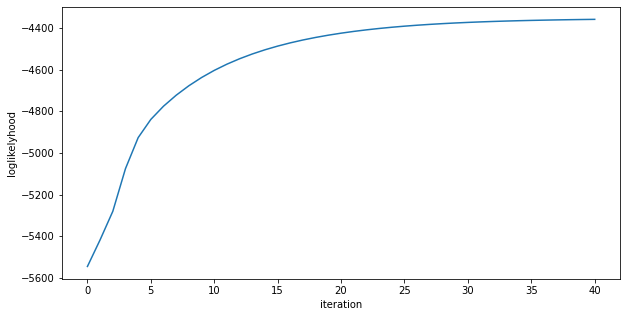

In [107]:
plt.figure(figsize=(10,5))
plt.xlabel("iteration")
plt.ylabel("loglikelyhood")
plt.plot(likelyhood)
plt.show()

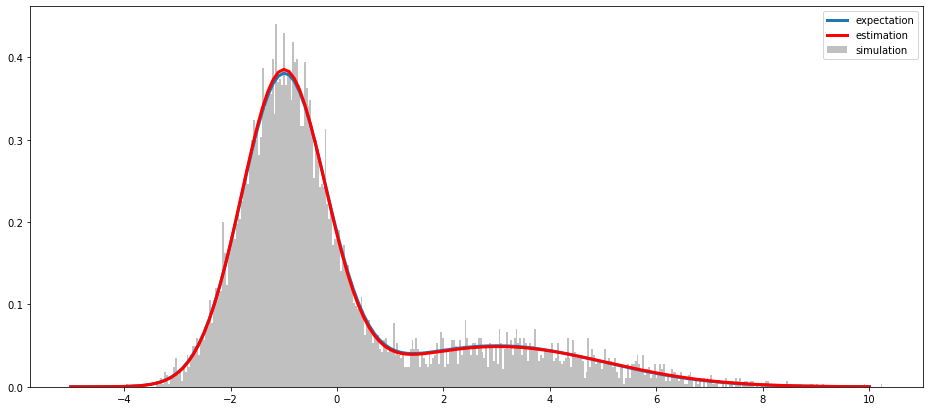

In [108]:
# plot the density
x = np.linspace(-5,10,151)
expectation = np.zeros(151)
for i in range(151):
    expectation[i] = 0.25* guassian(x[i],3,4) + 0.75 * guassian(x[i],-1,0.64)
estimation = np.zeros(151)
for i in range(151):
    for j in range(M):
        estimation[i] += alpha[j] * guassian(x[i],mean[j],cov[j])
plt.figure(figsize=(16,7))
plt.hist(X, bins=400, density=1,label = "simulation",color = 'silver')
plt.plot(x,expectation,linewidth = 3,label = "expectation")
plt.plot(x,estimation,linewidth = 3,label = "estimation",color = 'r')

plt.legend(loc='best')

plt.show()

## Question 1.3

<font size = 5>$\hat{f}_i(x)=\frac{1}{Nh}\sum_\limits{i=1}^NK(\frac{x-x_i}{h})$</font>

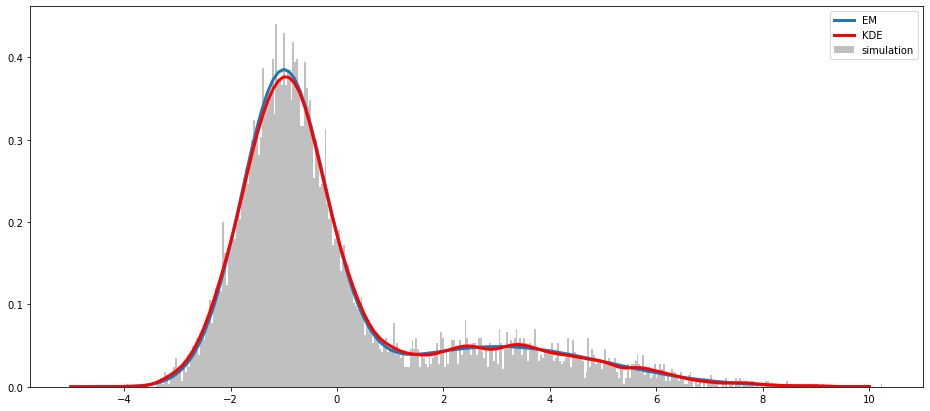

In [109]:
# use Gaussian kernel
def Kernel(x):
    return guassian(x,0,1)
h = 0.2
KDE = np.zeros(151)
for i in range(151):
    sum_k = np.sum([Kernel((x[i]- X[j])/h) for j in range(N)])
    KDE[i] = sum_k/N/h

plt.figure(figsize=(16,7))
plt.hist(X, bins=400, density=1,label = "simulation",color = 'silver')

plt.plot(x,estimation,linewidth = 3,label = "EM")
plt.plot(x,KDE,linewidth = 3,label = "KDE",color = 'r')
plt.legend(loc='best')

plt.show()

## Question 2.1

In [240]:
N = 2000
M = 3

mu = np.array([[-0.5,0.5],[5.5,1.5],[1,4]])
sigma = np.array([[[2,0.3],[0.3,0.5]],[[4,0.3],[0.3,0.5]],[[6,1],[1,2]]])
alpha = np.array([0.2,0.3,0.5])

In [241]:
p1 = 0
p2 = 0
p3 = 0

for n in range(N):
    a = np.random.randint(0,10)
    if (a == 0 or a == 1):
        p1 = p1 + 1
    elif (a == 2 or a == 3 or a == 4):
        p2 = p2 + 1
    else:
        p3 = p3 + 1
X_1 = np.random.multivariate_normal(mu[0],sigma[0],p1).T
X_2 = np.random.multivariate_normal(mu[1],sigma[1],p2).T
X_3 = np.random.multivariate_normal(mu[2],sigma[2],p3).T

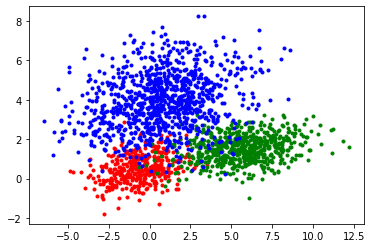

In [242]:
plt.scatter(X_1[0],X_1[1],marker = '.',color = 'r')
plt.scatter(X_2[0],X_2[1],marker = '.',color = 'g')
plt.scatter(X_3[0],X_3[1],marker = '.',color = 'b')
plt.show()

In [243]:
# merge all the results
X = np.concatenate((X_1,X_2,X_3),axis = 1).T
X

array([[-1.17695363, -0.26738309],
       [ 0.52344343,  1.67886193],
       [-0.62144205,  0.52192926],
       ...,
       [ 0.69061955,  4.30620894],
       [ 1.259542  ,  4.80071192],
       [-0.77971489,  4.77151707]])

## Question 2.2

<font size = 5>$ f(\pmb{x})=\frac{1}{{(2\pi)}^{d/2}|\Sigma|^{1/2}} exp [-\frac{1}{2}(\pmb{x}-\pmb{\mu})^T\Sigma^{-1}(\pmb{x}-\pmb{\mu})]$ </font>

In [244]:
d = 2

def multi_guassian(x, mu, cov):
    m1 = np.dot((x - mu),np.linalg.inv(cov))
    m2 = np.dot(m1,(x - mu).T)
    return np.exp(-0.5 * m2)/(2 * np.pi * np.sqrt(np.linalg.det(cov)))

In [245]:
def pro_multi(i,l):
    sum = 0
    j = 0
    for j in range(M):
        sum += alpha[j] * multi_guassian(X[i],mu[j],sigma[j])
    return alpha[l] * multi_guassian(X[i],mu[l],sigma[l])/sum

In [246]:
# need small adjustment for multi-dimension cases


def update_mu_m():
    mu_new = np.zeros((M,d))
    l = 0
    for l in range(M):
        sum1 = 0
        i = 0
        for i in range(N):
            sum1 += pro[i][l]
        sum2 = np.zeros((1,2))
        i = 0
        for i in range(N):
            sum2 += X[i] * pro[i][l]
        mu_new[l] = sum2/sum1
    
    
    return mu_new



def update_var_m(mean_n):
    var_new = np.array([])
    l = 0
    for l in range(M):
        sum3 = 0
        i = 0
        for i in range(N):
            sum3 += pro[i][l]
        sum4 = 0
        i = 0
        for i in range(N):
            sum4 += pro[i][l] * np.dot(np.mat(X[i]-mean_n[l]).T,np.mat(X[i]-mean_n[l]))
        var_new  = np.append(var_new,sum4/sum3)
    var_new = var_new.reshape(M,d,d)
    return var_new


In [250]:

mu = np.array([[-0.5,0.5],[5.5,1.5],[1,4]])
sigma = np.array([[[2,0.3],[0.3,0.5]],[[4,0.3],[0.3,0.5]],[[6,1],[1,2]]])
alpha = np.array([0.2,0.3,0.5])
print("-------------------------------------")
print("true parameters:")
print("alpha:")
print(alpha)
print("mu:")
print(mu)
print("covariance:")
print(sigma)
print("-------------------------------------")





# set an initial value
mu = np.array([[-1,1],[6,4],[2,5]])
sigma = np.array([[[3,0.5],[0.5,1]],[[5,0.2],[0.2,0.4]],[[5,2],[2,3]]])
alpha = np.array([0.3,0.5,0.2])

times = 51
likelyhood = np.array([])
# use a table to optimize
pro = np.zeros((N,M))


print("-------------------------------------")
print("initial values:")
print("alpha:")
print(alpha)
print("mu:")
print(mu)
print("covariance:")
print(sigma)
print("-------------------------------------")

for it in range(times):
    
    for i in range(N):
        for l in range(M):
            pro[i][l] = pro_multi(i,l)
    # compute the loglikelyhood
    llh = 0
    for i in range(N):
        pi = 0
        for l in range(M):
            pi += alpha[l] * pro[i][l]
        llh += np.log(pi)
    likelyhood = np.append(likelyhood,llh)
    # update
    alpha = np.array(update_alpha())
    mu = np.array(update_mu_m())
    sigma = np.array(update_var_m(mu))

print("-------------------------------------")
print("after %d iterations"%(times-1))
print("alpha:")
print(alpha)
print("mu:")
print(mu)
print("covariance:")
print(sigma)
print("-------------------------------------")

-------------------------------------
true parameters:
alpha:
[0.2 0.3 0.5]
mu:
[[-0.5  0.5]
 [ 5.5  1.5]
 [ 1.   4. ]]
covariance:
[[[2.  0.3]
  [0.3 0.5]]

 [[4.  0.3]
  [0.3 0.5]]

 [[6.  1. ]
  [1.  2. ]]]
-------------------------------------
-------------------------------------
initial values:
alpha:
[0.3 0.5 0.2]
mu:
[[-1  1]
 [ 6  4]
 [ 2  5]]
covariance:
[[[3.  0.5]
  [0.5 1. ]]

 [[5.  0.2]
  [0.2 0.4]]

 [[5.  2. ]
  [2.  3. ]]]
-------------------------------------
-------------------------------------
after 50 iterations
alpha:
[0.18818364 0.31089685 0.50091951]
mu:
[[-0.55813376  0.51045633]
 [ 5.56909926  1.53038249]
 [ 0.72270019  3.871237  ]]
covariance:
[[[1.97099732 0.30066924]
  [0.30066924 0.46998035]]

 [[4.06590326 0.31231275]
  [0.31231275 0.46025912]]

 [[6.15322145 0.97517518]
  [0.97517518 2.12974891]]]
-------------------------------------


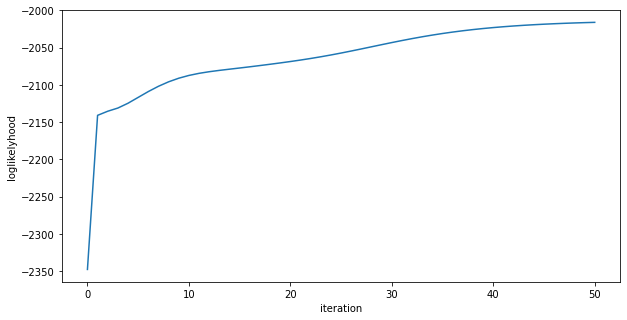

In [252]:
plt.figure(figsize=(10,5))
plt.xlabel("iteration")
plt.ylabel("loglikelyhood")
plt.plot(likelyhood)
plt.show()